Importing Library and reading Dataset

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'data.csv' with your file path)
df = pd.read_csv('./data/berlin_house_prices.csv')

In [46]:
df.head(5)

,url,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
0,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,249000.0,64.00,3.0,3.57,13505.0,1971.0,2.0,3890.625000
1,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",1295000.0,136.06,4.0,3.57,10405.0,1900.0,5.0,9517.859768
2,https://www.immowelt.de/expose/292m95u,Gas,Etagenheizung,770000.0,120.00,4.0,3.57,12161.0,1900.0,5.0,6416.666667
3,https://www.immowelt.de/expose/29sh55u,Gas,Zentralheizung,349000.0,158.00,5.0,3.57,12103.0,1956.0,1.0,2208.860759
4,https://www.immowelt.de/expose/29r5y5t,Gas,Etagenheizung,494990.0,126.00,4.0,3.57,12157.0,1909.0,3.0,3928.492063


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4942 entries, 0 to 4941
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                4942 non-null   object 
 1   energy             4942 non-null   object 
 2   heating            4942 non-null   object 
 3   price              4942 non-null   float64
 4   area               4942 non-null   float64
 5   rooms              4942 non-null   float64
 6   fee                4942 non-null   float64
 7   zipcode            4942 non-null   float64
 8   construction_year  4942 non-null   float64
 9   level              4942 non-null   float64
 10  price_per_area     4942 non-null   float64
dtypes: float64(8), object(3)
memory usage: 424.8+ KB


In [48]:
print(f'types of energy: {df["energy"].value_counts()}')
print(f'types of heating: {df["heating"].value_counts()}')

types of energy: energy
na                           2112
Gas                          1414
Fernwärme                     829
Öl                            413
Luft-/                         34
Fernwärme,                     28
Fußbodenheizung,               24
Elektro,                       24
Elektro                        15
Solar                          12
Blockheizkraftwerk,            11
Gas,                           10
Erdwärme                        5
Pellets                         3
Flüssiggas                      2
Blockheizkraftwerk              2
Niedrigenergiehaus              1
Holz,                           1
Erdwärme,                       1
Fußbodenheizung, offener        1
Name: count, dtype: int64
types of heating: heating
na                           2112
Zentralheizung               1839
Etagenheizung                 366
Fußbodenheizung,              206
Fußbodenheizung               174
Heizungsart                    70
Kamin,                         34
Wärmep

# Category cleaning

In [50]:
df['energy'] = df['energy'].str.strip().str.replace(',', '', regex=True)
df['heating'] = df['heating'].str.strip().str.replace(',', '', regex=True)

In [62]:
df['heating'].value_counts()

heating
na                         2112
Zentralheizung             1839
Fußbodenheizung             380
Etagenheizung               372
Heizungsart                  70
Kamin                        49
Wärmepumpe                   33
Wasser-                      24
Kf                           17
Niedrigenergiehaus           12
Fußbodenheizung offener      11
Etagenheizung offener         8
Heizungsartoffener            4
Luft-/                        3
Fertighaus                    3
Minergie zertifiziert         2
Ofen                          1
Kohle                         1
Wärmepumpe offener            1
Name: count, dtype: int64

In [66]:

df['heating'] = df['heating'].replace({
    'Fußbodenheizung offener': 'Fußbodenheizung',
    'Etagenheizung offener': 'Etagenheizung',
    'Wärmepumpe offener': 'Wärmepumpe',
    'Luft-/': 'Wärmepumpe',
    'Wasser-': 'Wärmepumpe'
})
# lets npw merge catgoreis having less then 50 obs to others
counts = df['heating'].value_counts()
other_categories = counts[counts < 48].index
df['heating'] = df['heating'].replace(other_categories, 'Others')
df['heating'].value_counts()

heating
na                 2112
Zentralheizung     1839
Fußbodenheizung     391
Etagenheizung       380
Heizungsart          74
Wärmepumpe           61
Kamin                49
Others               36
Name: count, dtype: int64

In [67]:
df['energy'].value_counts()

energy
na                         2112
Gas                        1424
Fernwärme                   857
Öl                          413
Elektro                      39
Luft-/                       34
Fußbodenheizung              24
Blockheizkraftwerk           13
Solar                        12
Erdwärme                      6
Pellets                       3
Flüssiggas                    2
Holz                          1
Niedrigenergiehaus            1
Fußbodenheizung offener       1
Name: count, dtype: int64

In [69]:
df['energy'] = df['energy'].str.strip()
df['energy'] = df['energy'].str.replace(',', '', regex=False)
df['energy'] = df['energy'].str.replace(r'\s*offener', '', regex=True)
energy_map = {
    'Luft-/': 'Wärmepumpe',
    'Fußbodenheizung': 'Andere',
    'Niedrigenergiehaus': 'Andere'
}

df['energy'] = df['energy'].replace(energy_map)

counts = df['energy'].value_counts()
rare = counts[counts < 20].index

df['energy'] = df['energy'].replace(rare, 'Other')


df['energy'].value_counts()

energy
na            2112
Gas           1424
Fernwärme      857
Öl             413
Elektro         39
Other           37
Wärmepumpe      34
Andere          26
Name: count, dtype: int64

## Dropping outlies

In [85]:
# at this point dropping will drop outliers
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)

df_no_outliers = df[(df['price']>q_low)&(df['price']<q_high)]

In [86]:
df_no_outliers.info()
# so we dropped 2% of the data(100 rows)

<class 'pandas.core.frame.DataFrame'>
Index: 4842 entries, 0 to 4941
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                4842 non-null   object 
 1   energy             4842 non-null   object 
 2   heating            4842 non-null   object 
 3   price              4842 non-null   float64
 4   area               4842 non-null   float64
 5   rooms              4842 non-null   float64
 6   fee                4842 non-null   float64
 7   zipcode            4842 non-null   float64
 8   construction_year  4842 non-null   float64
 9   level              4842 non-null   float64
 10  price_per_area     4842 non-null   float64
dtypes: float64(8), object(3)
memory usage: 453.9+ KB


<Axes: xlabel='price', ylabel='Count'>

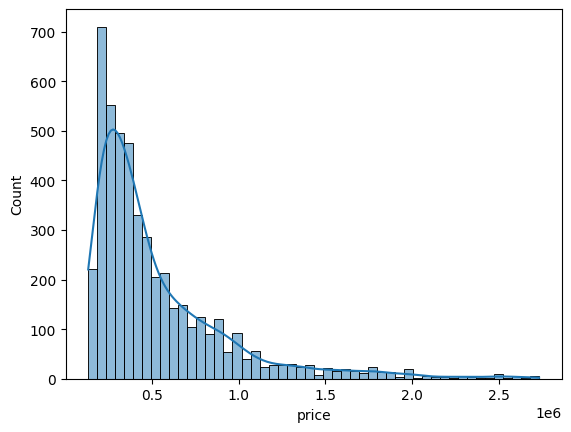

In [87]:
sns.histplot(df_new['price'], bins=50, kde=True)

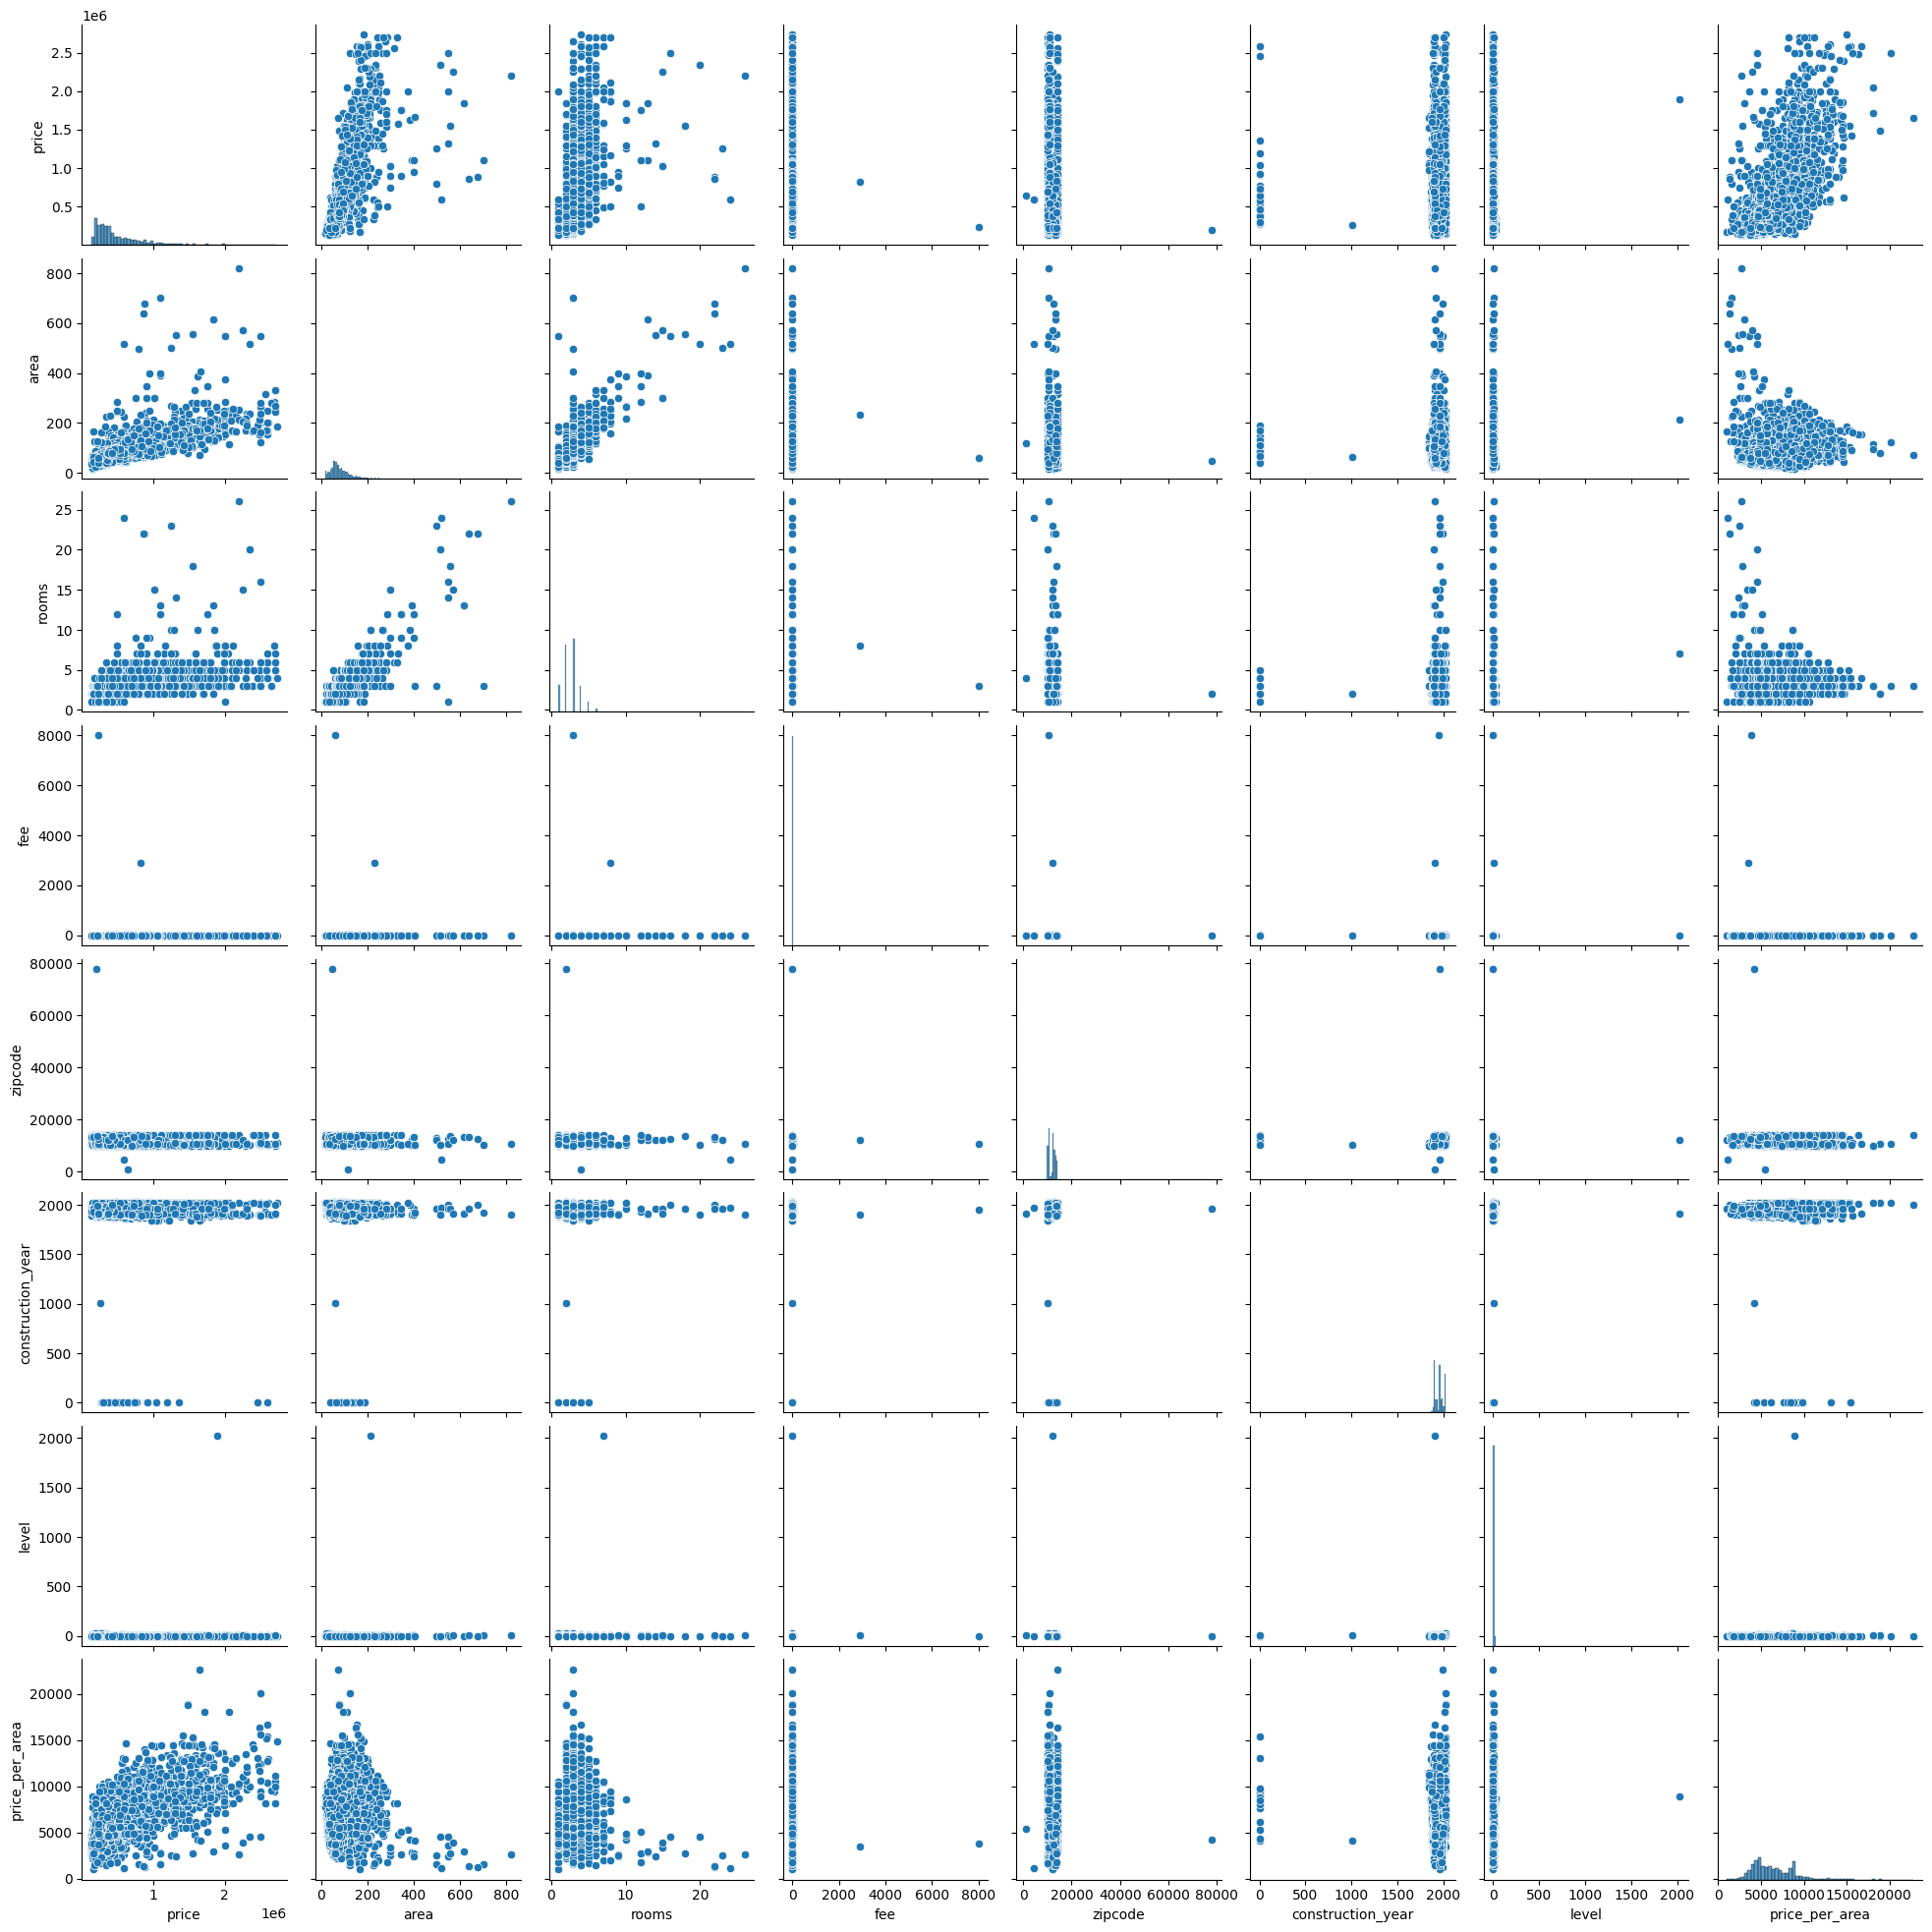

In [88]:
sns.pairplot(df_no_outliers)

### Deciding how to Impute
- Heating 
- Energy

In [89]:
df_no_outliers[df['heating']=='na']['heating'].value_counts()
df_no_outliers[df['energy']=='na']['energy'].value_counts()


C:\Users\adity\AppData\Local\Temp\ipykernel_18976\2374588584.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers[df['heating']=='na']['heating'].value_counts()
C:\Users\adity\AppData\Local\Temp\ipykernel_18976\2374588584.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers[df['energy']=='na']['energy'].value_counts()


energy
na    2071
Name: count, dtype: int64

heating
Zentralheizung     0.652111
Fußbodenheizung    0.138217
Etagenheizung      0.134248
Heizungsart        0.024901
Wärmepumpe         0.022014
Kamin              0.015518
Others             0.012992
Name: proportion, dtype: float64
energy
Gas           0.505594
Fernwärme     0.299170
Öl            0.147239
Elektro       0.013353
Other         0.012992
Wärmepumpe    0.012270
Andere        0.009383
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

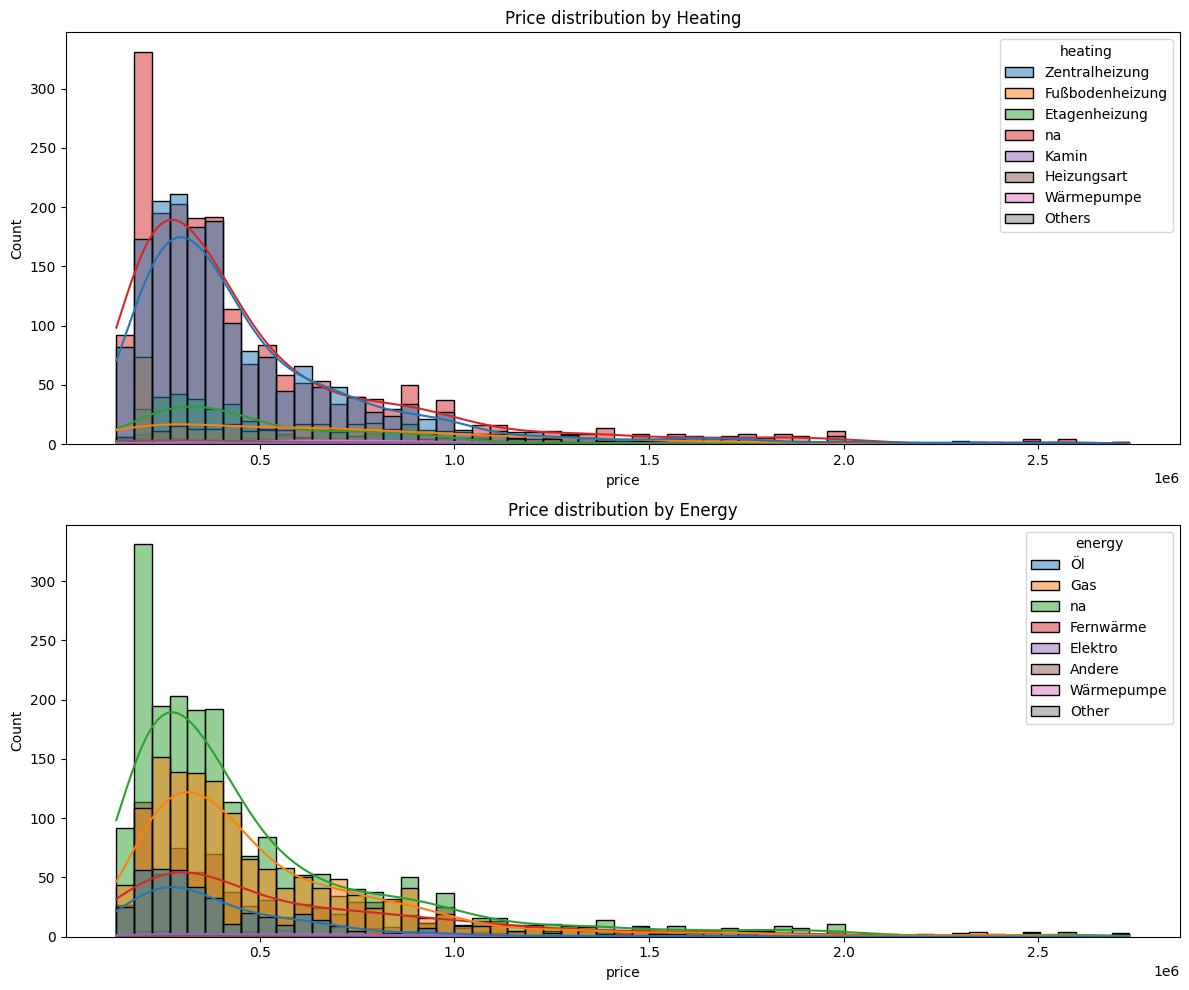

In [104]:
plt.figure(figsize=(10, 6)) 
print(df_no_outliers[df_no_outliers['heating']!='na']['heating'].value_counts(normalize=True))
print(df_no_outliers[df_no_outliers['energy']!='na']['energy'].value_counts(normalize=True))

fig, axes = plt.subplots(2, 1, figsize=(12, 10))  # 2 rows, 1 column

# First plot: price vs heating
sns.histplot(
    data=df_no_outliers,
    x='price',
    hue='heating',
    kde=True,
    ax=axes[0]  # assign to first subplot
)
axes[0].set_title('Price distribution by Heating')

# Second plot: price vs energy
sns.histplot(
    data=df_no_outliers,
    x='price',
    hue='energy',
    kde=True,
    ax=axes[1]  # assign to second subplot
)
axes[1].set_title('Price distribution by Energy')

plt.tight_layout()
plt.show()

##### To conclude we can impute by
- heating = Zentralheizung,Fußbodenheizung,Etagenheizung[0.7,0.15,0.15]
- energy = Gas, Fernwärme,Öl  [0.505594,0.299170,0.147239] round to [0.6,0.3,0.1]
- or simply all to cenatral heating

Both heating and energy has 2071 counts missing

In [105]:
heating_top_categories = ['Zentralheizung', 'Gas', 'Fernwärme']
energy_top_categories = ['Gas', 'Fernwärme', 'Wärmepumpe']
probabilities_heating = [0.7, 0.15, 0.15]  # just as an example
probabilities_energy = [0.6, 0.3, 0.1]  # just as an example
df_clean=df_no_outliers.copy()
df_clean.loc[df_clean['heating'] == 'na', 'heating'] = np.random.choice(heating_top_categories, size=df_clean[df_clean['heating']=='na'].shape[0], p=probabilities_heating)
df_clean.loc[df_clean['energy'] == 'na', 'energy'] = np.random.choice(energy_top_categories, size=df_clean[df_clean['energy']=='na'].shape[0], p=probabilities_energy)

heating
Zentralheizung     0.674515
Fußbodenheizung    0.079100
Etagenheizung      0.076828
Gas                0.064849
Fernwärme          0.061545
Heizungsart        0.014250
Wärmepumpe         0.012598
Kamin              0.008881
Others             0.007435
Name: proportion, dtype: float64
energy
Gas           0.547088
Fernwärme     0.299876
Öl            0.084263
Wärmepumpe    0.048327
Elektro       0.007641
Other         0.007435
Andere        0.005370
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

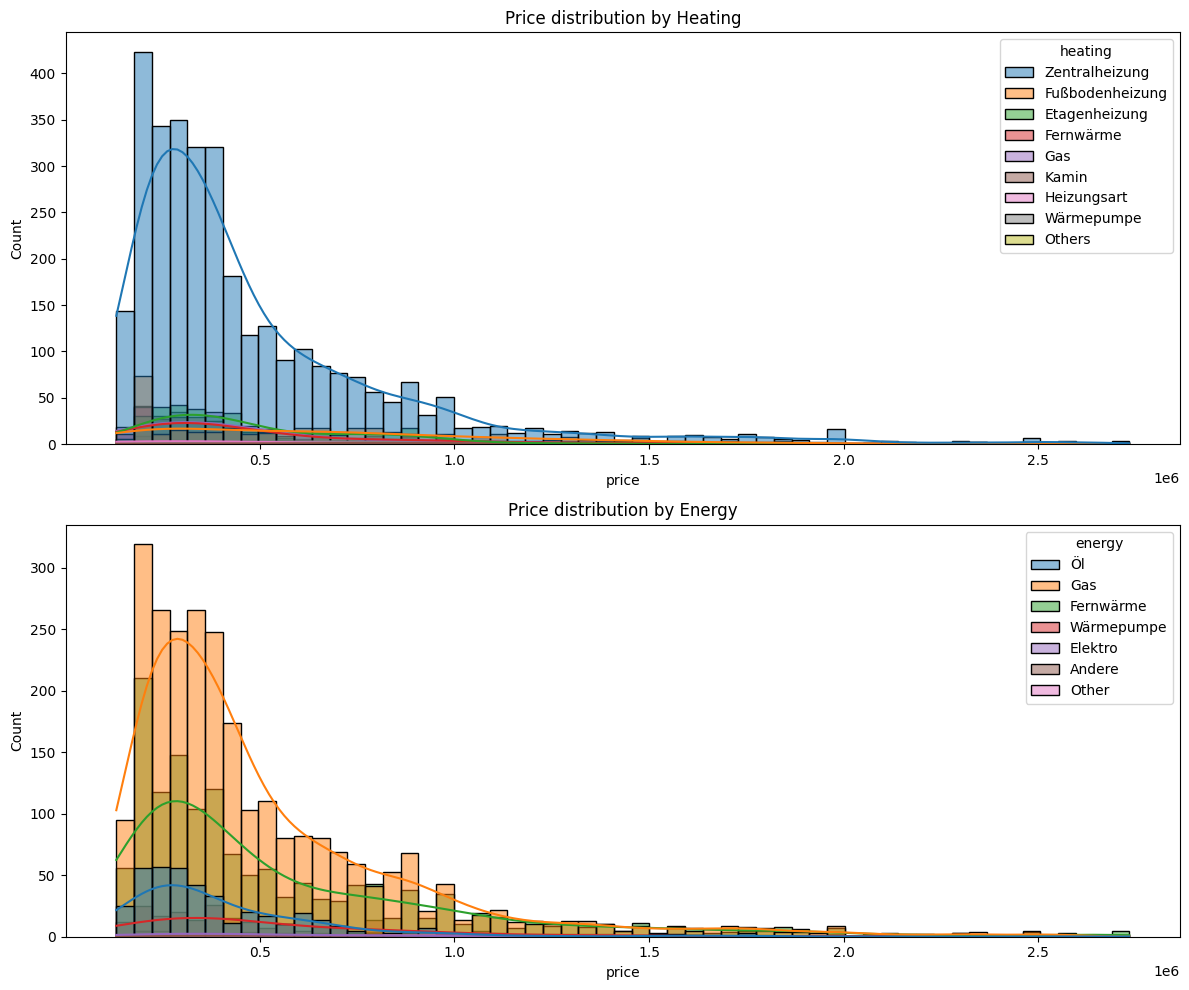

In [106]:
plt.figure(figsize=(10, 6)) 
print(df_clean[df_clean['heating']!='na']['heating'].value_counts(normalize=True))
print(df_clean[df_clean['energy']!='na']['energy'].value_counts(normalize=True))

fig, axes = plt.subplots(2, 1, figsize=(12, 10))  # 2 rows, 1 column

# First plot: price vs heating
sns.histplot(
    data=df_clean,
    x='price',
    hue='heating',
    kde=True,
    ax=axes[0]  # assign to first subplot
)
axes[0].set_title('Price distribution by Heating')

# Second plot: price vs energy
sns.histplot(
    data=df_clean,
    x='price',
    hue='energy',
    kde=True,
    ax=axes[1]  # assign to second subplot
)
axes[1].set_title('Price distribution by Energy')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Price distribution by Heating')

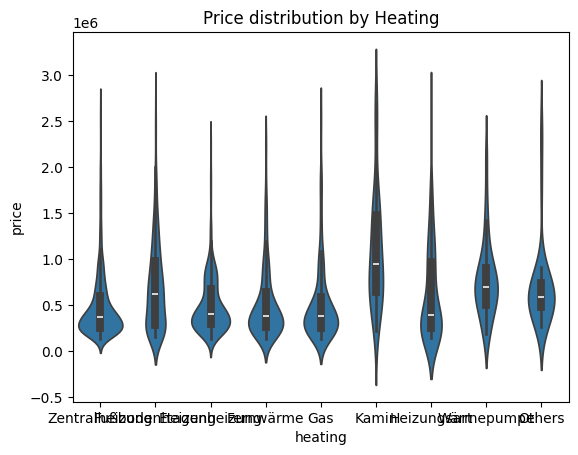

In [136]:
sns.violinplot(data=df_clean, x='heating', y='price')
plt.title('Price distribution by Heating')

## Lets now EDA properly with clean data

<Axes: xlabel='price', ylabel='Count'>

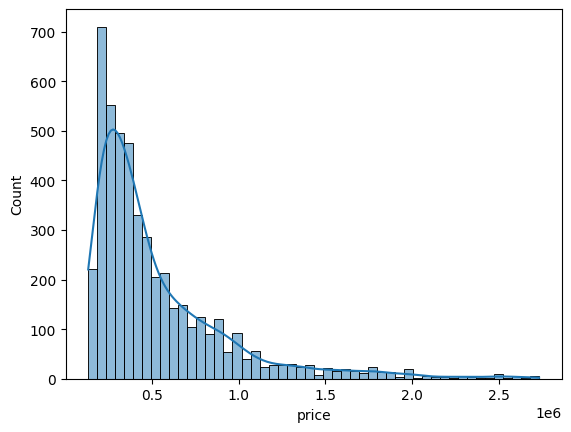

In [107]:
sns.histplot(df_new['price'], bins=50, kde=True)

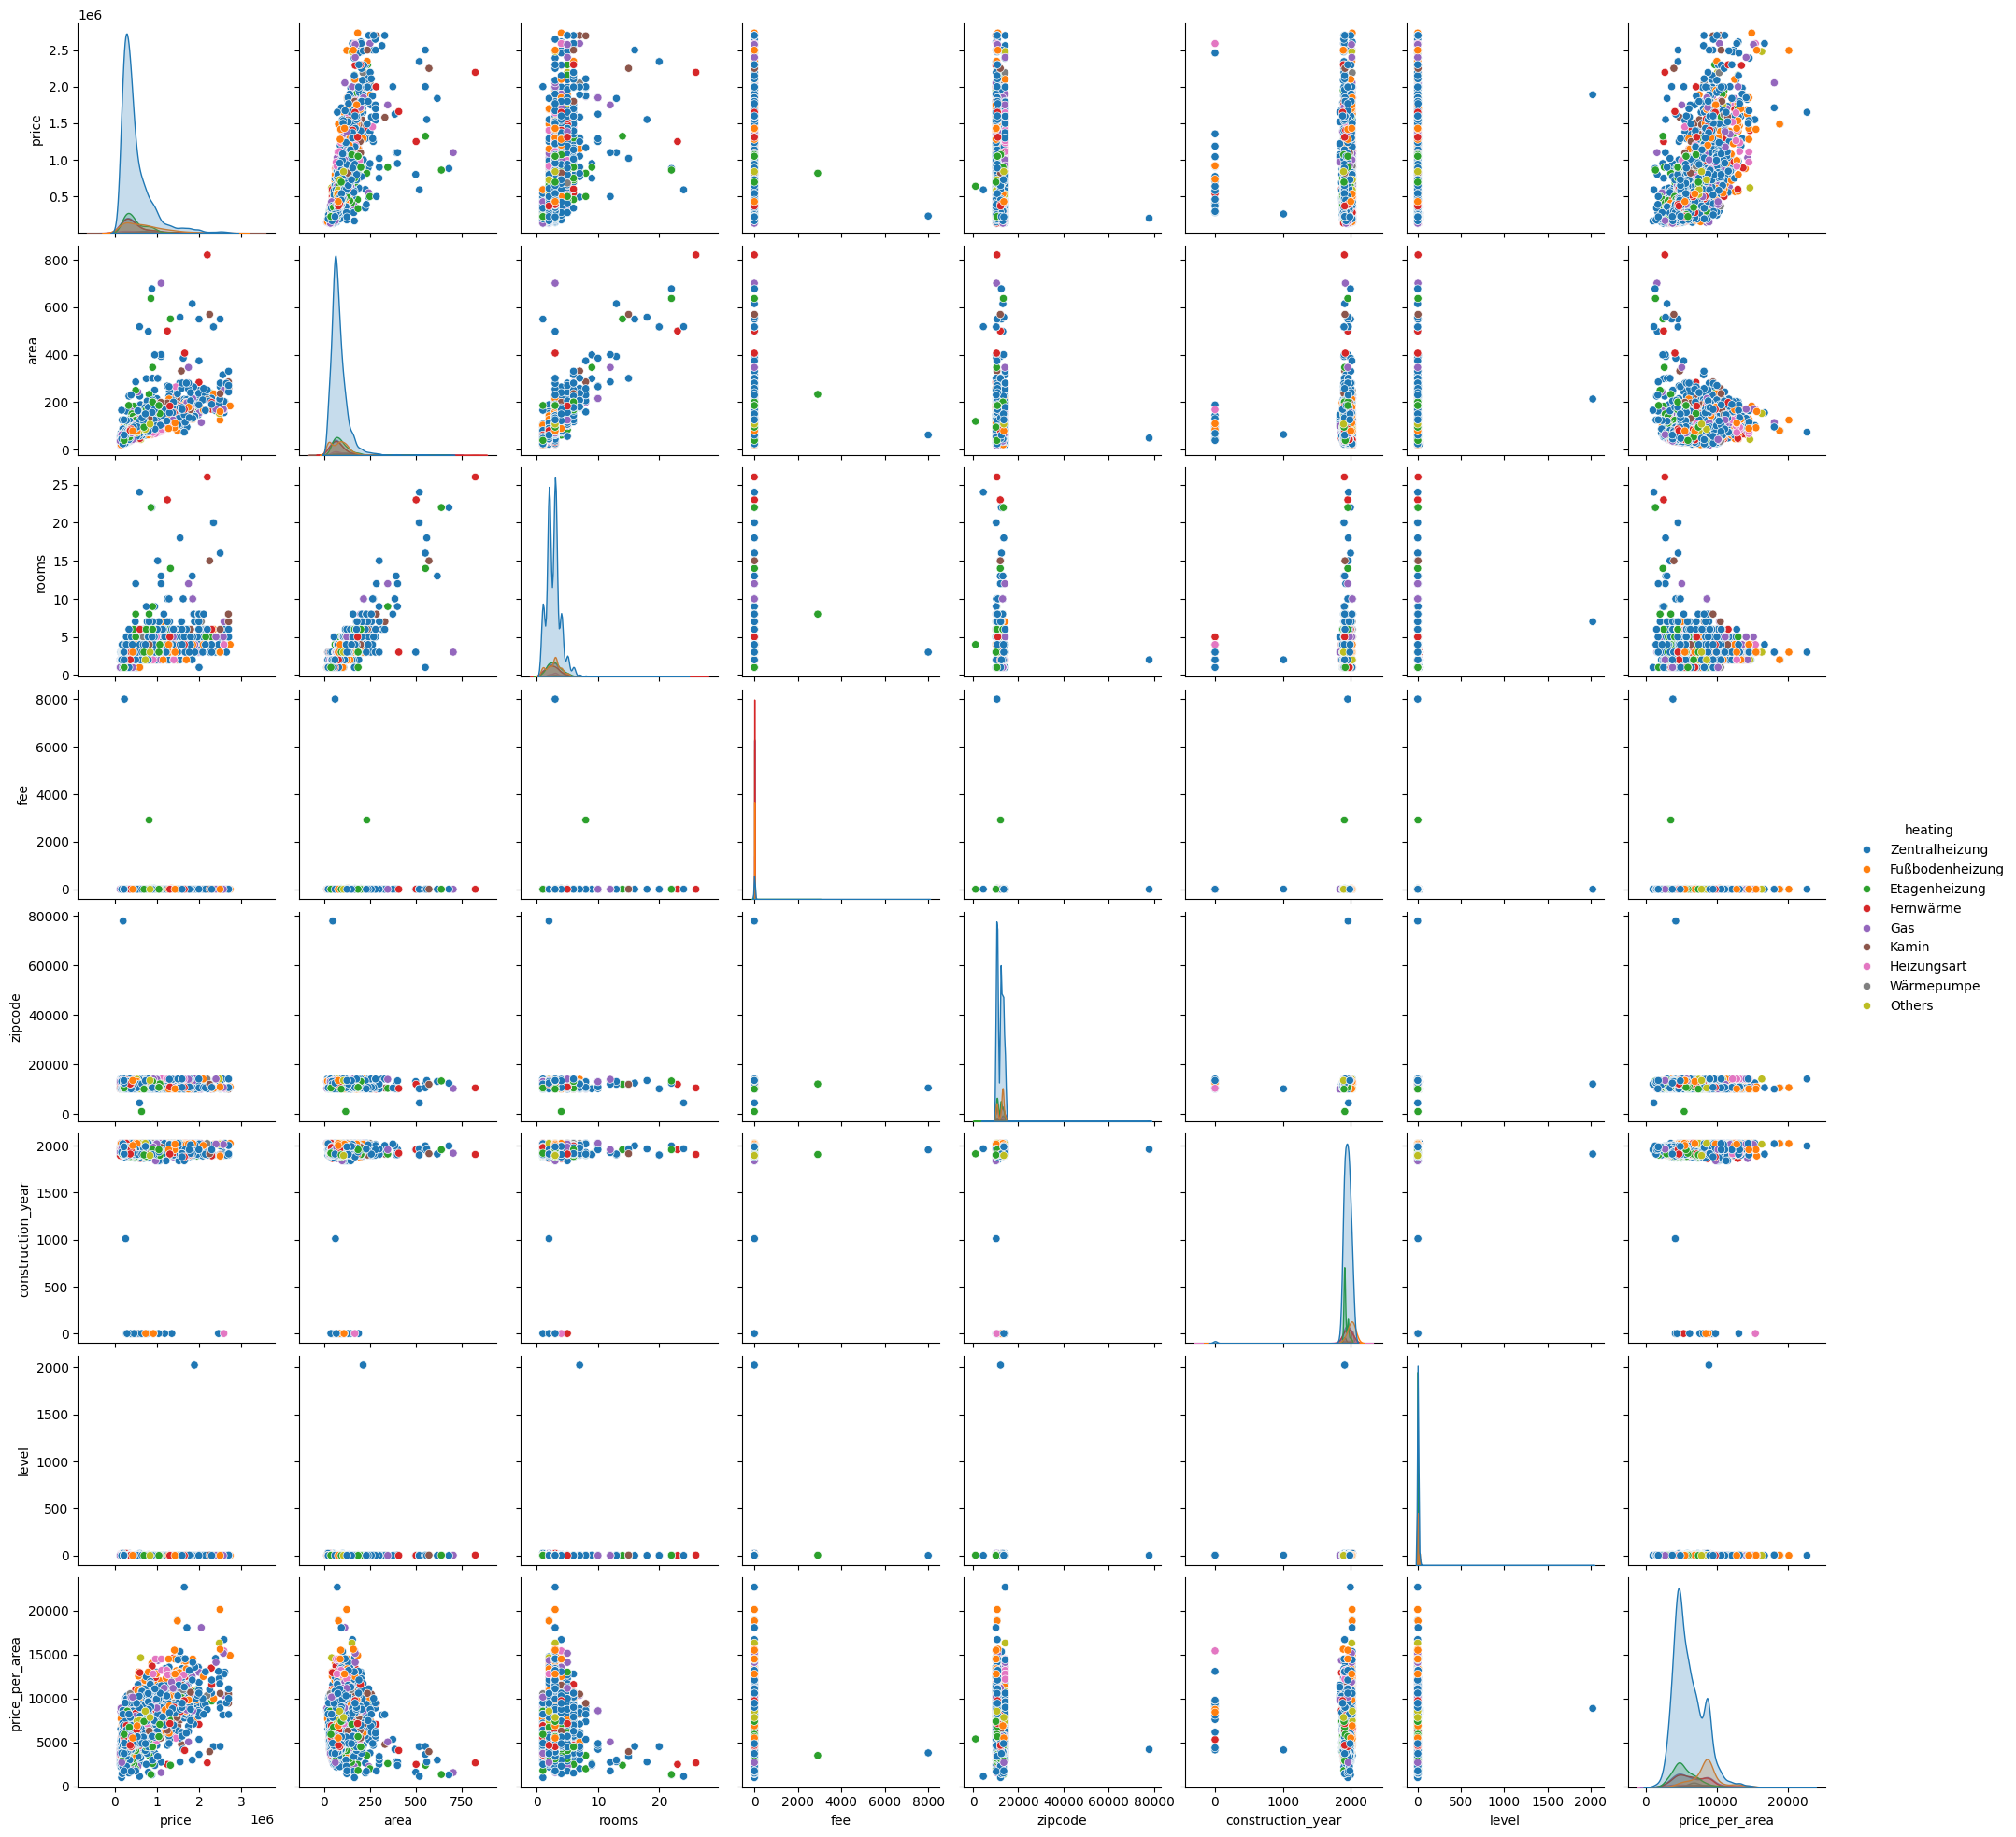

In [109]:
sns.pairplot(df_clean,hue='heating')

In [114]:
df['zipcode'].nunique()

190

In [121]:
from scipy.stats import f_oneway

groups = [group['price'].values for name, group in df_clean.groupby('zipcode')]
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}, p-value: {p_val}")

F-statistic: 7.489382408803916, p-value: 1.4222546932244577e-157


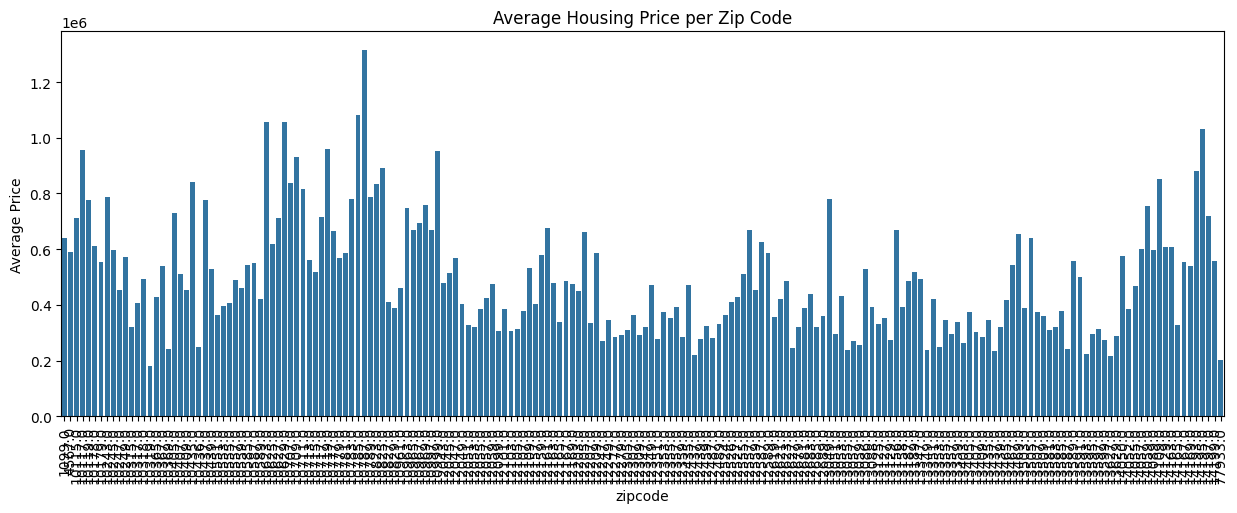

In [116]:
avg_price_per_zip = df_clean.groupby('zipcode')['price'].mean().sort_values()
plt.figure(figsize=(15,5))
sns.barplot(x=avg_price_per_zip.index, y=avg_price_per_zip.values)
plt.xticks(rotation=90)
plt.ylabel("Average Price")
plt.title("Average Housing Price per Zip Code")
plt.show()

#### Considered other factors like area, rooms etc. Let's ignore zipcode for now. We can incorporate it later if we need model improvement.

min          1.000000
max       2026.000000
mean      1944.318876
median    1956.000000
Name: construction_year, dtype: float64


<Axes: xlabel='construction_year', ylabel='Count'>

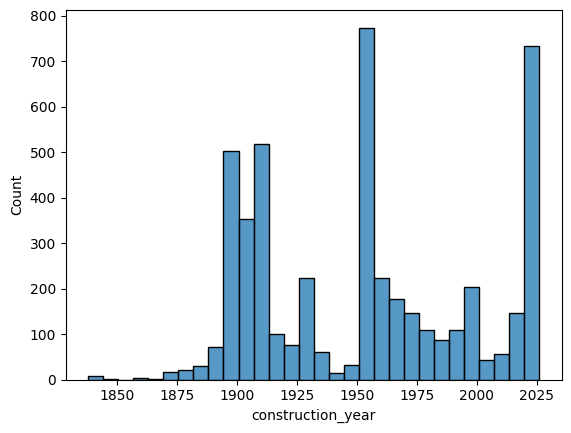

In [128]:

print(df_clean['construction_year'].agg(['min', 'max', 'mean', 'median']))
#lets fix the old construction year values
df_clean.loc[df_clean['construction_year'] < 1800, 'construction_year'] = df_clean['construction_year'].median()
sns.histplot(df_clean, x='construction_year', bins=30)

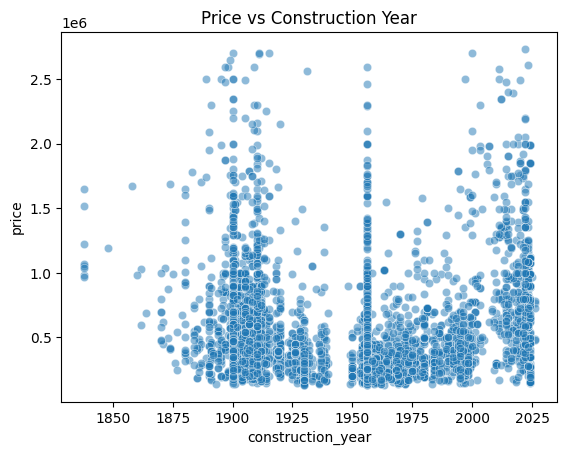

In [129]:
sns.scatterplot(
    data=df_clean,
    x='construction_year',
    y='price',
    alpha=0.5
)
plt.title('Price vs Construction Year')
plt.show()

### It does not seem that construction year is important

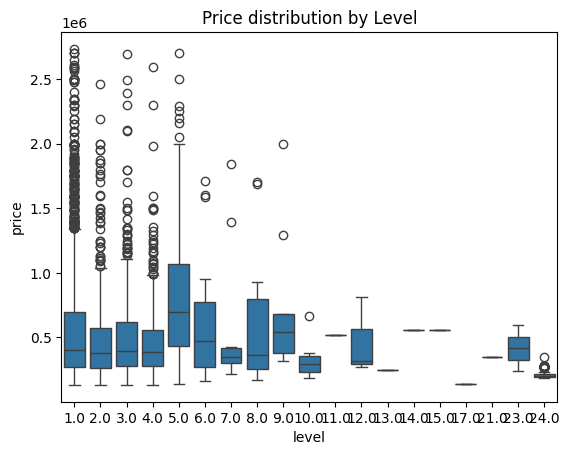

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_clean[df_clean['level']<100], x='level', y='price')
plt.title('Price distribution by Level')
plt.show()

It doesnt seem that level plays a role it might me random noise

Text(0.5, 1.0, 'Correlation Heatmap')

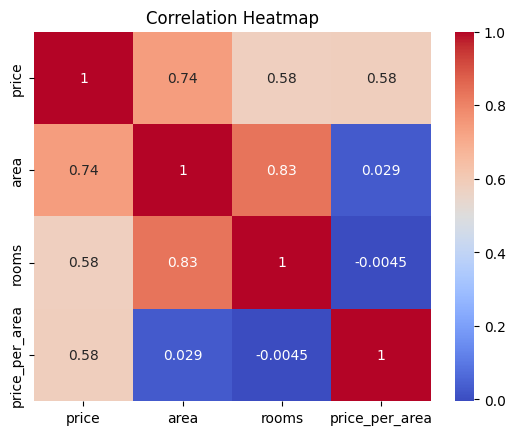

In [138]:
sns.heatmap(df_clean[['price','area','rooms','price_per_area']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

### To conclude we will now consider
- Rooms, Area to predict price
- We can incoroprate Heating and Energy later if it improves model
- At last we may use Zipcode too if and only if it improves our model

In [139]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


X = df_clean[['area','rooms','price_per_area']]  # feature matrix
y = df_clean['price']  # target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with pipelines including StandardScaler
models = {
    "LinearRegression": Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    "Ridge": Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=1.0))]),
    "Lasso": Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha=0.1))]),
    "ElasticNet": Pipeline([('scaler', StandardScaler()), ('model', ElasticNet(alpha=0.1, l1_ratio=0.5))]),
    "RandomForest": Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(n_estimators=100, random_state=42))]),
    "GradientBoosting": Pipeline([('scaler', StandardScaler()), ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))]),
    "SVR": Pipeline([('scaler', StandardScaler()), ('model', SVR(kernel='rbf', C=1.0, epsilon=0.1))])
}

# Train and evaluate models
results = {}
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name}: MSE = {mse:.4f}, R2 = {r2:.4f}")

# Optional: sort models by R2
sorted_results = sorted(results.items(), key=lambda x: x[1]['R2'], reverse=True)
print("\nModels sorted by R2 score:")
for name, metrics in sorted_results:
    print(f"{name}: R2 = {metrics['R2']:.4f}, MSE = {metrics['MSE']:.4f}")

LinearRegression: MSE = 17869267179.4663, R2 = 0.8954
Ridge: MSE = 17881237855.9717, R2 = 0.8954
Lasso: MSE = 17869289016.9963, R2 = 0.8954
ElasticNet: MSE = 20350173022.6319, R2 = 0.8809
RandomForest: MSE = 611940739.8487, R2 = 0.9964
GradientBoosting: MSE = 1085458626.2225, R2 = 0.9936
SVR: MSE = 189356812287.4788, R2 = -0.1082

Models sorted by R2 score:
RandomForest: R2 = 0.9964, MSE = 611940739.8487
GradientBoosting: R2 = 0.9936, MSE = 1085458626.2225
LinearRegression: R2 = 0.8954, MSE = 17869267179.4663
Lasso: R2 = 0.8954, MSE = 17869289016.9963
Ridge: R2 = 0.8954, MSE = 17881237855.9717
ElasticNet: R2 = 0.8809, MSE = 20350173022.6319
SVR: R2 = -0.1082, MSE = 189356812287.4788


In [145]:
X = df_clean[['area','rooms','price_per_area','heating','energy','zipcode']]  # feature matrix
X = pd.get_dummies(X, columns=['heating', 'energy'], drop_first=True)  # one-hot encode categorical variables
y = df_clean['price']  # target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=52)

results = {}
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name}: MSE = {mse:.4f}, R2 = {r2:.4f}")

# Optional: sort models by R2
sorted_results = sorted(results.items(), key=lambda x: x[1]['R2'], reverse=True)
print("\nModels sorted by R2 score:")
for name, metrics in sorted_results:
    print(f"{name}: R2 = {metrics['R2']:.4f}, MSE = {metrics['MSE']:.4f}")

LinearRegression: MSE = 25769019279.0479, R2 = 0.8479
Ridge: MSE = 25745206462.0126, R2 = 0.8481
Lasso: MSE = 25768965745.2311, R2 = 0.8479
ElasticNet: MSE = 25261639095.7583, R2 = 0.8509


d:\Berlin_House_Price_Prediction\Berlin_House_Price_Prediction\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.938e+10, tolerance: 3.035e+10
  model = cd_fast.enet_coordinate_descent(


RandomForest: MSE = 3798561447.7070, R2 = 0.9776
GradientBoosting: MSE = 2914870431.0278, R2 = 0.9828
SVR: MSE = 191992077710.1617, R2 = -0.1330

Models sorted by R2 score:
GradientBoosting: R2 = 0.9828, MSE = 2914870431.0278
RandomForest: R2 = 0.9776, MSE = 3798561447.7070
ElasticNet: R2 = 0.8509, MSE = 25261639095.7583
Ridge: R2 = 0.8481, MSE = 25745206462.0126
Lasso: R2 = 0.8479, MSE = 25768965745.2311
LinearRegression: R2 = 0.8479, MSE = 25769019279.0479
SVR: R2 = -0.1330, MSE = 191992077710.1617
